In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('/content/Zoo.csv')

In [56]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [57]:
df.shape

(101, 18)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [59]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [60]:
df.duplicated().sum()

np.int64(0)

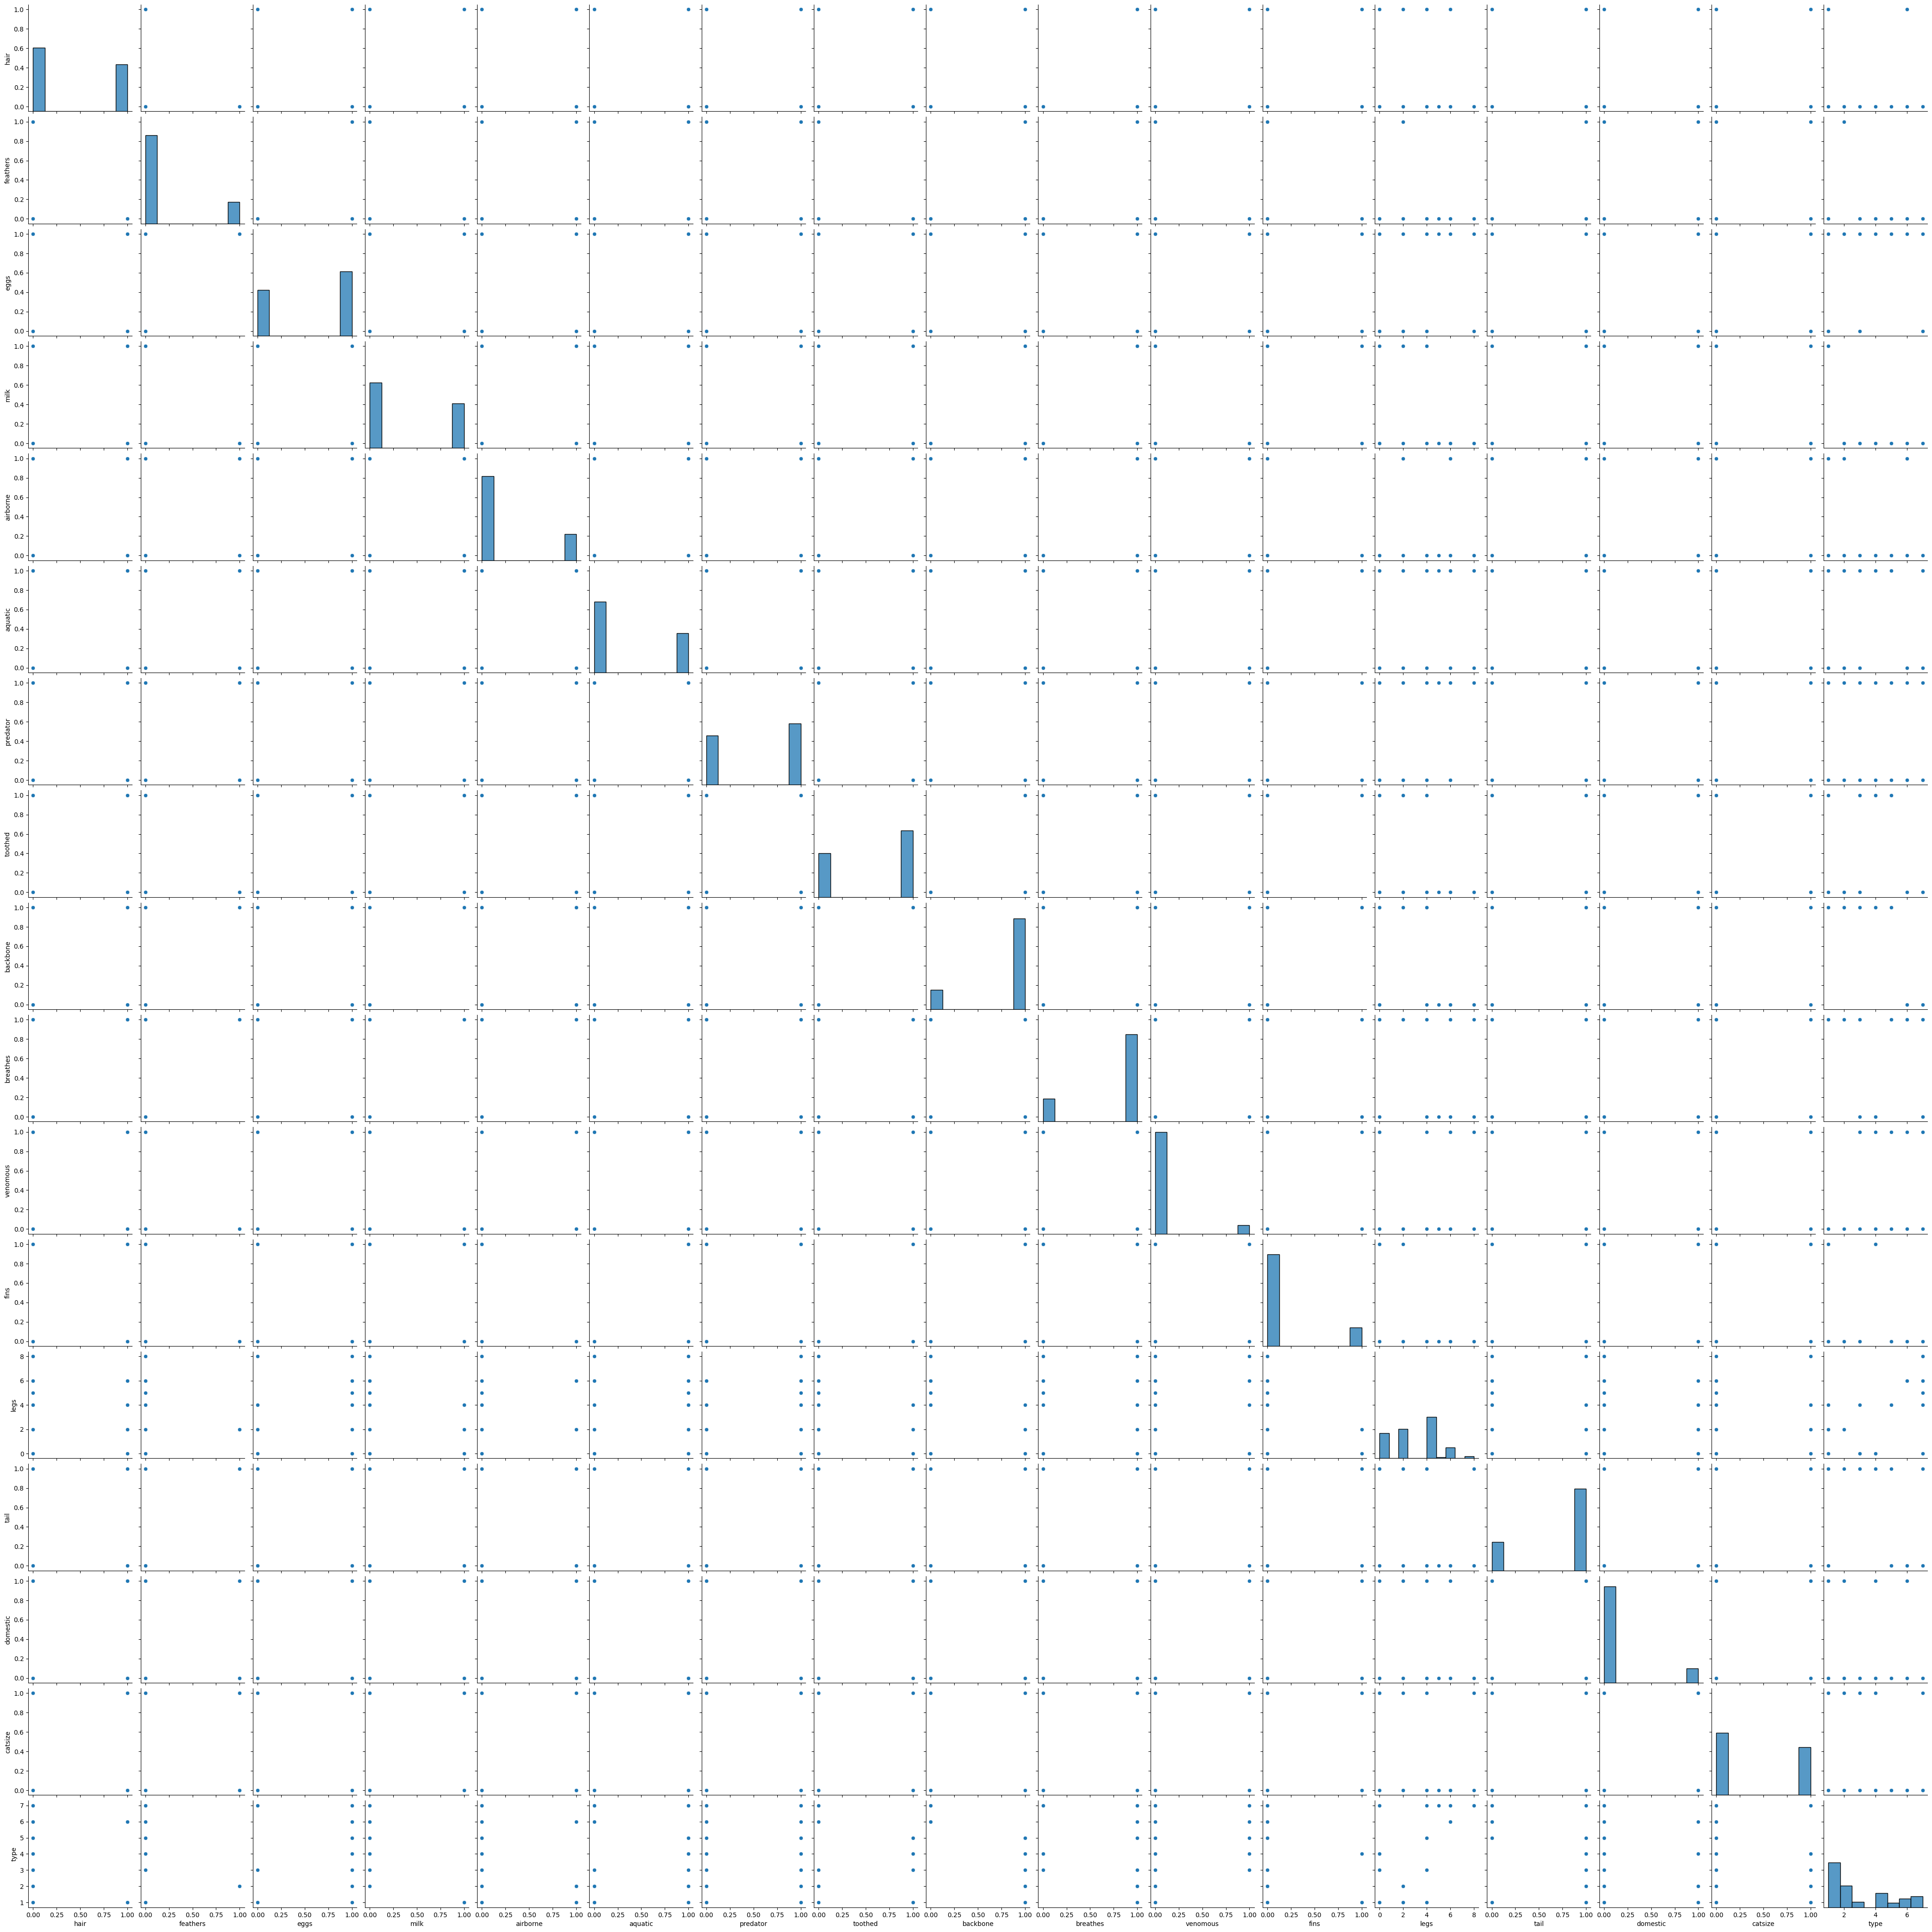

In [61]:
sns.pairplot(df)

<Axes: ylabel='Count'>

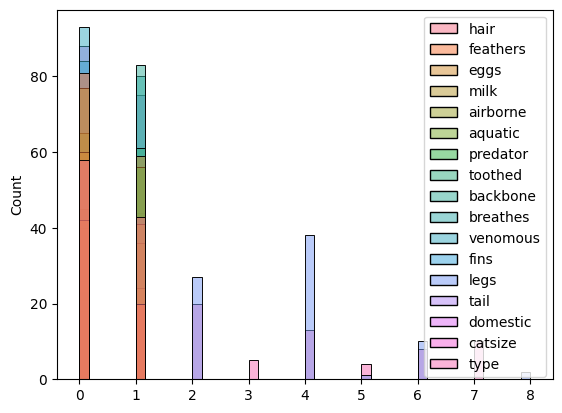

In [62]:
sns.histplot(df)

In [63]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df.iloc[:,0] = LE.fit_transform(df.iloc[:,0])

<Axes: >

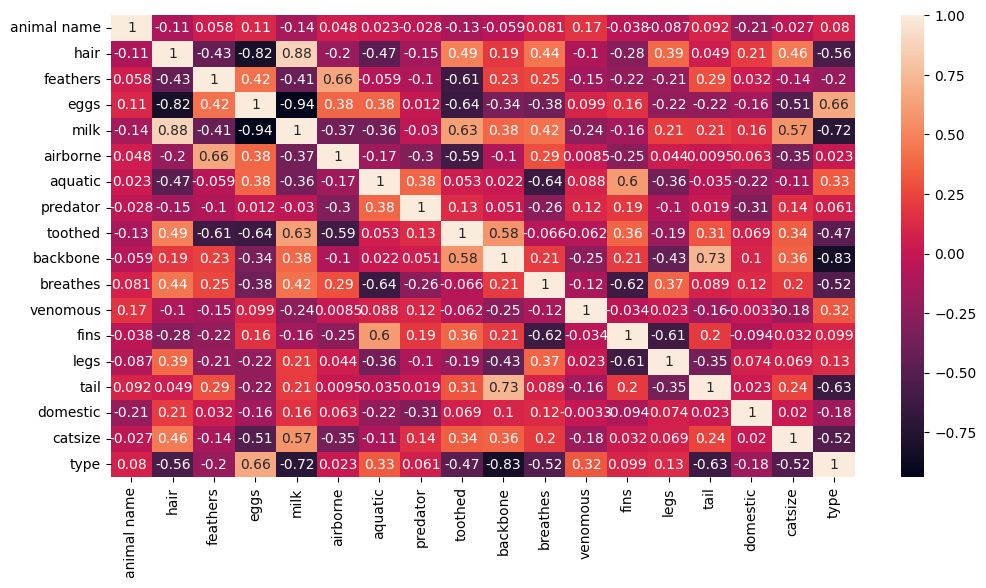

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [65]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [66]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [67]:
y

,animal name
0,0
1,1
2,2
3,3
4,4
...,...
96,95
97,96
98,97
99,98


In [68]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)
y = pd.DataFrame(y)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 0)

In [71]:
model = KNeighborsClassifier()
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [72]:
ypred =model.predict(xtest)

In [73]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy',accuracy_score(ytest,ypred))
print('Precision',precision_score(ytest,ypred, average = 'weighted'))
print('Recall',recall_score(ytest,ypred, average = 'weighted'))
print('F1_score',f1_score(ytest,ypred, average = 'weighted'))

Accuracy 0.047619047619047616
Precision 0.047619047619047616
Recall 0.047619047619047616
F1_score 0.047619047619047616


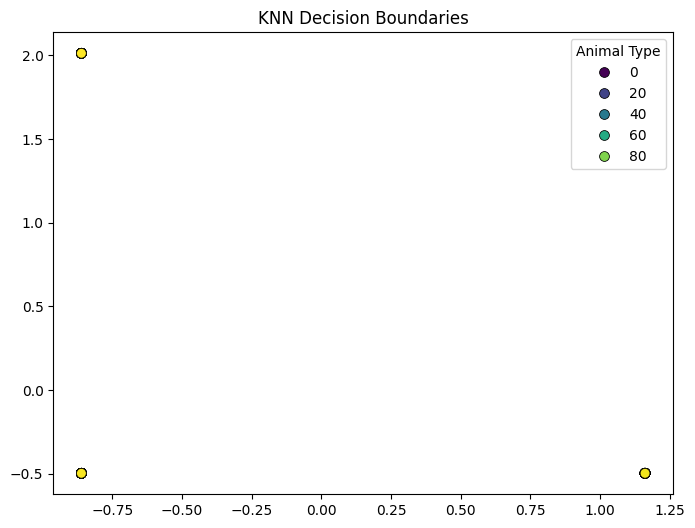

In [79]:
X_scaled = scaler.fit_transform(x)

plt.figure(figsize=(8, 6))

if X_scaled.ndim > 1:
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='viridis', edgecolor="k", s=50) # Replace 'cmap_points' if not defined
else:
    sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=y, palette='viridis', edgecolor="k", s=50)

plt.title("KNN Decision Boundaries") # Adjust title as needed
plt.legend(title="Animal Type")
plt.show()

# 1. What are the key hyperparameters in KNN?
- n_neighbors: Number of nearest neighbors to consider.

- weights: Determines the influence of neighbors (uniform or distance-based).

- metric: Defines the distance calculation method (Euclidean, Manhattan, etc.).

- p: Adjusts the power for Minkowski distance (p=1 for Manhattan, p=2 for Euclidean).

- algorithm: Specifies the method for nearest neighbor search (auto, ball tree, KD tree, brute).

# 2. What distance metrics can be used in KNN?
- Euclidean Distance: Measures straight-line distance between two points.

- Manhattan Distance: Measures distance based on grid-like paths.

- Minkowski Distance: A generalized form of Euclidean and Manhattan distances.

- Hamming Distance: Used for categorical data, counts the number of differing positions.

- Cosine Similarity: Measures the angle between two vectors, useful for text classification.